<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="cognitiveclass.ai logo">
</center>


# Machine Learning Foundation

## Course 4, Part b: Distance and the Curse of Dimensionality DEMO


Estimated time needed: **45** minutes


In [25]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import seaborn as sns, pandas as pd, numpy as np

In [26]:
from matplotlib import pyplot as plt
import numpy as np

# Curse of Dimensionality

### DEMO objectives:
* Gain understanding of why observations are far apart in high-dimensional space
* See an example of how adding dimensions degrades model performance for classification
* Learn how to fight the curse of dimensionality in your modeling projects

-----

### In high-dimensional space, points tend to be far apart.
This impacts data analysis. Intuitively, clustering is difficult when points are far away from each other: If my next nearest neighbor is very far away, does it still make sense to call it my neighbor? This notebook will show why high-dimensional space leads to sparse data.


### A circle inside a square

Let's start by drawing a unit circle inside of a square.


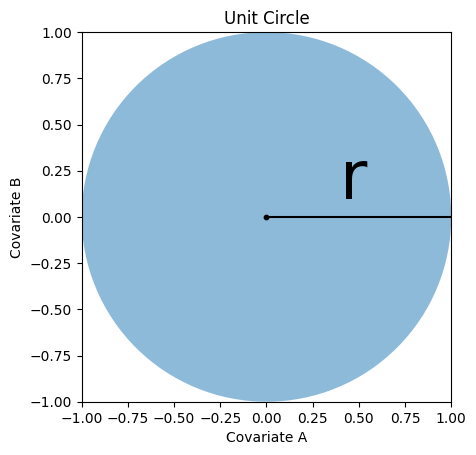

In [27]:
def make_circle(point=0):
    fig = plt.gcf() # Lấy đối tượng figure hiện tại
    ax = fig.add_subplot(111, aspect='equal') # Thêm subplot với tỷ lệ khung hình bằng nhau
    fig.gca().add_artist(plt.Circle((0,0),1,alpha=.5)) # Thêm hình tròn đơn vị vào trục
    ax.scatter(0,0,s=10,color="black") # Vẽ điểm tại gốc tọa độ
    ax.plot(np.linspace(0,1,100),np.zeros(100),color="black") # Vẽ đường ngang từ 0 đến 1
    ax.text(.4,.1,"r",size=48) # Thêm văn bản 'r' để biểu thị bán kính
    ax.set_xlim(left=-1,right=1) # Đặt giới hạn trục x
    ax.set_ylim(bottom=-1,top=1) # Đặt giới hạn trục y
    plt.xlabel("Covariate A") # Đặt nhãn trục x
    plt.ylabel("Covariate B") # Đặt nhãn trục y
    plt.title("Unit Circle") # Đặt tiêu đề biểu đồ

    if point:
        ax.text(.55,.9,"Far away",color="purple") # Thêm văn bản 'Far away' nếu point = 1
        ax.scatter(.85,.85,s=10,color="purple") # Vẽ điểm màu tím nếu point = 1
    else:
        plt.show() # Hiển thị biểu đồ

make_circle() # Gọi hàm để tạo và hiển thị hình tròn

Each axis is a different covariate. Imagine we've standard scaled our data, so they're centered on zero. This means that the average for each covariate is now zero, or the center of our circle. Points that our outside the unit circle would be harder to classify because the values of their covariates are far from the mean.


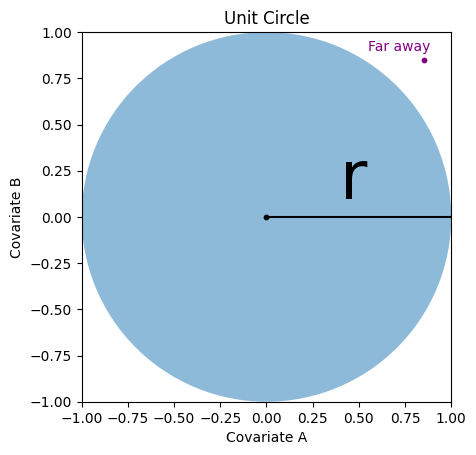

In [28]:
make_circle(1) # Gọi hàm make_circle với point=1 để hiển thị điểm 'Far away'

### How much of the square is outside the circle? And the cube outside the sphere, etc.

We've concluded that our purple point above would be hard to classify because it's far away from the rest of our observations. But what percentage of our points in the square are outside of the circle, and thus "far away"? Let's do some math!

Since the square has length $2r$ and area $(2r)^2$, the percentage of the square outside the circle is:  1 - $\frac {\pi r^2} {(2r)^2} = 1 - \frac \pi 4$ = ~ 21%

But what about a cube? To illustrate, we will use [matplotlib's 3-D axis](https://matplotlib.org/3.2.1/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) which allows the '3d' projection, as well as the [itertools](https://docs.python.org/3/library/itertools.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01) library, which offers a number of efficient tools for looping and combining lists. We will use the [product](https://docs.python.org/2/library/itertools.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01#itertools.product) (cartesian product) and [combinations](https://docs.python.org/2/library/itertools.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork821-2023-01-01#itertools.combinations) (unique subsequences) functions.


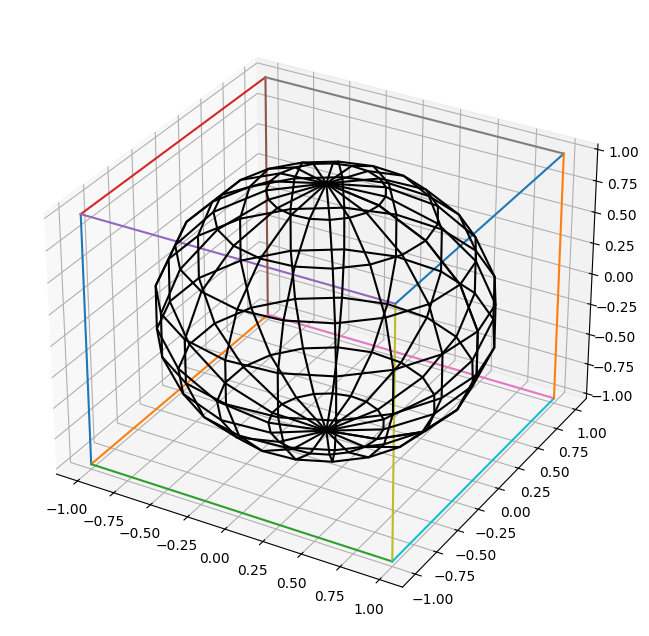

In [29]:
from mpl_toolkits.mplot3d import Axes3D # Nhập Axes3D cho biểu đồ 3D
import matplotlib.pyplot as plt # Nhập pyplot để vẽ biểu đồ
import numpy as np # Nhập numpy để làm việc với mảng
from itertools import product, combinations # Nhập product và combinations từ itertools

# Create figure
fig = plt.figure(figsize=(8,8)) # Tạo đối tượng figure với kích thước 8x8
ax = fig.add_subplot(projection='3d') # Thêm subplot 3D vào figure
#ax.set_aspect("equal") # Đặt tỷ lệ khung hình bằng nhau (bị chú thích)

# Draw cube
r = [-1, 1] # Đặt giới hạn cho các cạnh của hình lập phương
for s, e in combinations(np.array(list(product(r,r,r))), 2): # Lặp qua tất cả các cạnh của hình lập phương
    if np.sum(np.abs(s-e)) == r[1]-r[0]: # Kiểm tra xem các điểm có tạo thành một cạnh không
        ax.plot3D(*zip(s,e)) # Vẽ cạnh hình lập phương

# Draw sphere on same axis
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j] # Tạo lưới cho bề mặt hình cầu
x=np.cos(u)*np.sin(v) # Tính tọa độ x của hình cầu
y=np.sin(u)*np.sin(v) # Tính tọa độ y của hình cầu
z=np.cos(v) # Tính tọa độ z của hình cầu
ax.plot_wireframe(x, y, z, color="black"); # Vẽ khung dây của hình cầu

The volume of the sphere is given by the forumula: $\frac{4}{3} \pi r^3$, and since the cube has a radius of $2r$, it has volume $(2r)^3$.

This allows us to calculate the percent of the cube's volume that's outside of the sphere: 1- $\frac {\frac 4 3 \pi r^3} {(2r)^3} = 1 - \frac \pi 6$ = ~ 48%

### Can we generalize to more than three dimensions?

Let's draw a bunch of random points from a 0-1 distribution, then measure how far away from the origin they are.


In [30]:
# Draw a sample of data in two dimensions
sample_data = np.random.sample((5,2)) # Tạo dữ liệu mẫu ngẫu nhiên 5x2
print("Sample data:\n", sample_data, '\n') # In dữ liệu mẫu

def norm(x):
    ''' Measure the distance of each point from the origin.

    Input: Sample points, one point per row
    Output: The distance from the origin to each point
    '''
    return np.sqrt( (x**2).sum(1) ) # Tính khoảng cách từ gốc tọa độ đến mỗi điểm (căn bậc hai của tổng bình phương các tọa độ)

def in_the_ball(x):
    ''' Determine if the sample is in the circle.

    Input: Sample points, one point per row
    Output: A boolean array indicating whether the point is in the ball
    '''
    return norm(x) < 1 # Kiểm tra xem khoảng cách có nhỏ hơn 1 (nằm trong hình tròn) không


for x, y in zip(norm(sample_data),in_the_ball(sample_data)): # Lặp qua khoảng cách và kết quả kiểm tra
    print("Norm = ", x.round(2), "; is in circle? ", y) # In khoảng cách và kết quả kiểm tra

Sample data:
 [[0.19863598 0.12047504]
 [0.56575333 0.66947432]
 [0.43881412 0.36680266]
 [0.34241917 0.656116  ]
 [0.6025651  0.05652064]] 

Norm =  0.23 ; is in circle?  True
Norm =  0.88 ; is in circle?  True
Norm =  0.57 ; is in circle?  True
Norm =  0.74 ; is in circle?  True
Norm =  0.61 ; is in circle?  True


Can we generalize beyond two dimensions?


In [31]:
def what_percent_of_the_ncube_is_in_the_nball(d_dim,
                                              sample_size=10**4):
    shape = sample_size,d_dim # Đặt kích thước mẫu
    data = np.array([in_the_ball(np.random.sample(shape)).mean() # Lấy mẫu ngẫu nhiên trong n-cube và tính phần trăm nằm trong n-ball, lặp lại 100 lần
                     for iteration in range(100)])
    return data.mean() # Trả về giá trị trung bình của phần trăm

dims = range(2,15) # Đặt phạm vi số chiều
data = np.array(list(map(what_percent_of_the_ncube_is_in_the_nball,dims))) # Áp dụng hàm cho từng số chiều


for dim, percent in zip(dims,data): # Lặp qua số chiều và phần trăm
    print("Dimension = ", dim, "; percent in ball = ", percent) # In số chiều và phần trăm

Dimension =  2 ; percent in ball =  0.7848519999999998
Dimension =  3 ; percent in ball =  0.5232530000000001
Dimension =  4 ; percent in ball =  0.30808599999999997
Dimension =  5 ; percent in ball =  0.163904
Dimension =  6 ; percent in ball =  0.080557
Dimension =  7 ; percent in ball =  0.036973000000000006
Dimension =  8 ; percent in ball =  0.015858999999999998
Dimension =  9 ; percent in ball =  0.006493000000000001
Dimension =  10 ; percent in ball =  0.002451
Dimension =  11 ; percent in ball =  0.0009289999999999999
Dimension =  12 ; percent in ball =  0.00031700000000000006
Dimension =  13 ; percent in ball =  0.00010100000000000002
Dimension =  14 ; percent in ball =  2.9999999999999997e-05


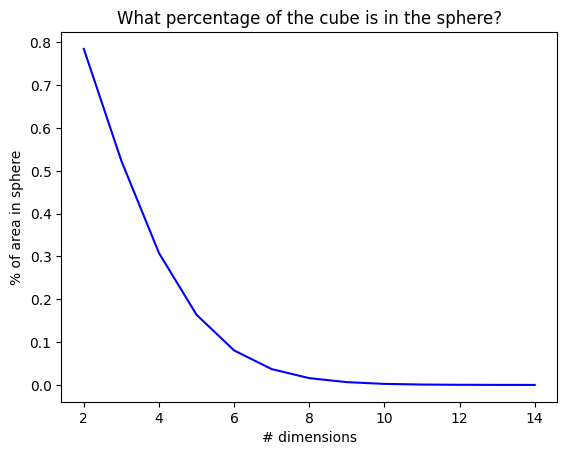

In [32]:
# Let's plot the above percentages

plt.plot(dims, data, color='blue') # Vẽ biểu đồ đường của phần trăm theo số chiều
plt.xlabel("# dimensions") # Đặt nhãn trục x
plt.ylabel("% of area in sphere") # Đặt nhãn trục y
plt.title("What percentage of the cube is in the sphere?") # Đặt tiêu đề biểu đồ
plt.show() # Hiển thị biểu đồ

## Check for understanding

What happens to the percentage of the area in the sphere as we increase the number of dimensions? What does this mean about how the dispersion of our data?

---


### Measuring the distance from the center of the cube to the nearest point

Let's continue with our drawing of random points in the cube. This time, we'll draw a bunch of points, then measure the distance of all the points to the center of the cube to see how close the closest point is to the center.

If we find out that the closest point is far from the center in high dimensions, that gives us more evidence that increasing dimensions will make it harder to classify our data properly.


In [33]:
def get_min_distance(dimension, sample_size=10**3):
    ''' Sample some random points and find the closet
    of those random points to the center of the data '''
    points = np.random.sample((sample_size,dimension))-.5   # Lấy mẫu ngẫu nhiên các điểm và căn giữa chúng
    return np.min(norm(points)) # Trả về khoảng cách nhỏ nhất từ gốc đến các điểm

def estimate_closest(dimension):
    ''' For a given dimension, take a random sample in that dimension and then find
        that sample's closest point to the center of the data.
        Repeat 100 times for the given dimension and return the min/max/mean
        of the distance for the nearest point. '''
    data = np.array([get_min_distance(dimension) for _ in range(100)]) # Lặp lại 100 lần để ước tính khoảng cách nhỏ nhất
    return data.mean(), data.min(), data.max() # Trả về giá trị trung bình, nhỏ nhất và lớn nhất của khoảng cách nhỏ nhất

# Calculate for dimensions 2-100
dims = range(2,100) # Đặt phạm vi số chiều
min_distance_data = np.array(list(map(estimate_closest,dims))) # Áp dụng hàm ước tính cho từng số chiều

# Test it for dimension 6
print("For dimension 6: ", estimate_closest(6)) # In kết quả ước tính cho số chiều 6

For dimension 6:  (np.float64(0.22302714525530362), np.float64(0.10452884426000873), np.float64(0.3062894831497271))


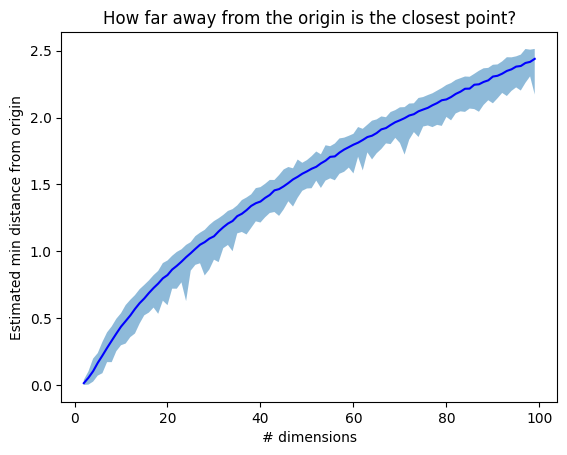

In [34]:
# Plot the min/max/mean of the closest point for each dimension using sampling

plt.plot(dims,min_distance_data[:,0], color='blue') # Vẽ biểu đồ đường cho khoảng cách nhỏ nhất trung bình
plt.fill_between(dims, min_distance_data[:,1], min_distance_data[:,2],alpha=.5) # Tô vùng giữa khoảng cách nhỏ nhất và lớn nhất
plt.xlabel("# dimensions") # Đặt nhãn trục x
plt.ylabel("Estimated min distance from origin") # Đặt nhãn trục y
plt.title("How far away from the origin is the closest point?"); # Đặt tiêu đề biểu đồ

## Check for understanding

What would we have to do to get similar density of points as the low dimensions if we wanted to use higher dimensions of data?

---


### How to fight the curse of dimensionality

The curse of dimensionality is a common hurdle in real-world predictive modeling. We've already seen this in our bag-of-words approach to NLP. How can we create good models in cases where our data is of high dimensionality?

* Feature selection: Use domain knowledge to reduce the number of features included in the model
* Feature extraction: Use dimensionality reduction techniques (e.g. PCA) to transform the raw data into a lower number of features that preserve (most of) the variability in the data

We'll talk more about PCA next.


## How does high dimensionality affect model performance?

We'll test model performance (classification accuracy) by creating some random data for classification, one set with a low number of features and another with a very high number of features. We'll then compare their performance using the same classification algorithm.


In [35]:
import numpy as np # Nhập numpy
import matplotlib.pyplot as plt # Nhập pyplot
from sklearn.model_selection import train_test_split # Nhập train_test_split để chia dữ liệu
from sklearn.preprocessing import StandardScaler # Nhập StandardScaler để chuẩn hóa dữ liệu
from sklearn.datasets import make_classification # Nhập make_classification để tạo dữ liệu phân loại
from sklearn.tree import DecisionTreeClassifier # Nhập DecisionTreeClassifier cho mô hình cây quyết định

In [36]:
# Create a dataset with two features

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=2) # Tạo dữ liệu phân loại với 2 đặc trưng
rng = np.random.RandomState(2) # Khởi tạo trình tạo số ngẫu nhiên
X += 2 * rng.uniform(size=X.shape) # Thêm nhiễu đồng nhất vào dữ liệu

X = StandardScaler().fit_transform(X) # Chuẩn hóa dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42) # Chia dữ liệu thành tập huấn luyện và tập kiểm tra

In [37]:
DT =  DecisionTreeClassifier() # Khởi tạo mô hình cây quyết định
DT.fit(X_train, y_train) # Huấn luyện mô hình trên dữ liệu huấn luyện
score = DT.score(X_test, y_test) # Đánh giá mô hình trên dữ liệu kiểm tra

In [38]:
print("Score from two-feature classifier: ", score) # In điểm số của bộ phân loại 2 đặc trưng

Score from two-feature classifier:  0.875


In [39]:
# Now do the same thing but with 200 features

X, y = make_classification(n_features=200, n_redundant=0, n_informative=200,
                           random_state=1, n_clusters_per_class=2) # Tạo dữ liệu phân loại với 200 đặc trưng
rng = np.random.RandomState(2) # Khởi tạo trình tạo số ngẫu nhiên
X += 2 * rng.uniform(size=X.shape) # Thêm nhiễu đồng nhất vào dữ liệu

X = StandardScaler().fit_transform(X) # Chuẩn hóa dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42) # Chia dữ liệu thành tập huấn luyện và tập kiểm tra

DT =  DecisionTreeClassifier() # Khởi tạo mô hình cây quyết định
DT.fit(X_train, y_train) # Huấn luyện mô hình trên dữ liệu huấn luyện
score = DT.score(X_test, y_test) # Đánh giá mô hình trên dữ liệu kiểm tra

In [40]:
print("Score from 200-feature classifier: ", score) # In điểm số của bộ phân loại 200 đặc trưng

Score from 200-feature classifier:  0.425


Here we see that adding additional features, even if informative, can lead to worse model performance (due to increased overfitting of training data.


### Comparing accuracy of classification against number of features

Let's see what happens if we keep adding features to our classification problem. We'll hold the number of classes at three in order to see how the curse of dimensionality hurts our model performance.


In [ ]:
scores = [] # Khởi tạo danh sách để lưu trữ điểm số

increment, max_features = 50, 4000 # Đặt bước tăng và số lượng đặc trưng tối đa

for num in np.linspace(increment, max_features, increment, dtype='int'): # Lặp qua số lượng đặc trưng tăng dần

    X, y = make_classification(n_features=num, n_redundant=0,
                               random_state=1, n_clusters_per_class=1, n_classes = 3) # Tạo dữ liệu phân loại với số lượng đặc trưng hiện tại
    rng = np.random.RandomState(2) # Khởi tạo trình tạo số ngẫu nhiên
    X += 2 * rng.uniform(size=X.shape) # Thêm nhiễu đồng nhất vào dữ liệu

    X = StandardScaler().fit_transform(X) # Chuẩn hóa dữ liệu
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42) # Chia dữ liệu thành tập huấn luyện và tập kiểm tra


    DT =  DecisionTreeClassifier() # Khởi tạo mô hình cây quyết định
    DT.fit(X_train, y_train) # Huấn luyện mô hình trên dữ liệu huấn luyện
    scores.append( DT.score(X_test, y_test) ) # Đánh giá mô hình và thêm điểm số vào danh sách

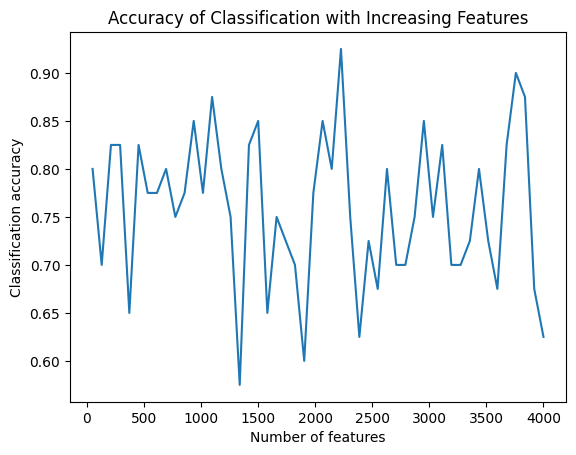

In [24]:
plt.plot(np.linspace(increment, max_features, increment, dtype='int'),scores) # Vẽ biểu đồ đường của điểm số theo số lượng đặc trưng
plt.title("Accuracy of Classification with Increasing Features") # Đặt tiêu đề biểu đồ
plt.xlabel("Number of features") # Đặt nhãn trục x
plt.ylabel("Classification accuracy"); # Đặt nhãn trục y

As we can see from the chart, adding features can lead to reductions in accuracy -- in this example accuracy is highly volatile in the number of features, and increasing features can reduce accuracy. Additionally, in our example, we specified that none of the features are redundnant (`n_redundant=0`). In practice, the situation is often worse as several of the features may be either redundant or not relevant. For example, if we are predicting customer churn using a variety of customer characteristics, we may have collected extensive data for each customer across many dimensions. This is an example of high-dimensional, which can make it difficult to apply unsupervised learning methods directly and potentially to lead to issues with the curse of dimensionality.

---
### Machine Learning Foundation (C) 2020 IBM Corporation
